<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Loading-the-Data-and-Selecting-the-Features" data-toc-modified-id="Loading-the-Data-and-Selecting-the-Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the Data and Selecting the Features</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Explore Data</a></span></li><li><span><a href="#Selecting-the-Features" data-toc-modified-id="Selecting-the-Features-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Selecting the Features</a></span></li></ul></li></ul></li><li><span><a href="#PD-Model-Estimation" data-toc-modified-id="PD-Model-Estimation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PD Model Estimation</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Build-a-Logistic-Regression-Model-with-P-Values" data-toc-modified-id="Build-a-Logistic-Regression-Model-with-P-Values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Build a Logistic Regression Model with P-Values</a></span></li></ul></li><li><span><a href="#PD-Model-Validation-(Test)" data-toc-modified-id="PD-Model-Validation-(Test)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PD Model Validation (Test)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Out-of-sample-validation-(test)" data-toc-modified-id="Out-of-sample-validation-(test)-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Out-of-sample validation (test)</a></span></li><li><span><a href="#Accuracy-and-Area-under-the-Curve" data-toc-modified-id="Accuracy-and-Area-under-the-Curve-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Accuracy and Area under the Curve</a></span></li><li><span><a href="#Gini-and-Kolmogorov-Smirnov" data-toc-modified-id="Gini-and-Kolmogorov-Smirnov-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Gini and Kolmogorov-Smirnov</a></span></li></ul></li></ul></li><li><span><a href="#Applying-the-PD-Model" data-toc-modified-id="Applying-the-PD-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Applying the PD Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Calculating-PD-of-individual-accounts" data-toc-modified-id="Calculating-PD-of-individual-accounts-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Calculating PD of individual accounts</a></span></li><li><span><a href="#Creating-a-Scorecard" data-toc-modified-id="Creating-a-Scorecard-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Creating a Scorecard</a></span></li><li><span><a href="#Caclulating-Credit-Score" data-toc-modified-id="Caclulating-Credit-Score-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Caclulating Credit Score</a></span></li><li><span><a href="#From-Credit-Score-to-PD" data-toc-modified-id="From-Credit-Score-to-PD-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>From Credit Score to PD</a></span></li><li><span><a href="#Setting-Cut-offs" data-toc-modified-id="Setting-Cut-offs-5.0.5"><span class="toc-item-num">5.0.5&nbsp;&nbsp;</span>Setting Cut-offs</a></span></li></ul></li></ul></li></ul></div>

# Import Libraries

In [48]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [49]:
# data_home = '../data_old/processed/'

# loan_data_inputs_train = pd.read_csv( data_home + 'loan_data_inputs_train.csv', index_col = 0)

# loan_data_targets_train = pd.read_csv(data_home + 'loan_data_targets_train.csv', index_col = 0)

# loan_data_inputs_test = pd.read_csv(data_home + 'loan_data_inputs_test.csv', index_col = 0)


# loan_data_targets_test = pd.read_csv(data_home + 'loan_data_targets_test.csv', index_col = 0)

In [50]:
data_home = '../data/processed/'

loan_data_inputs_train = pd.read_csv( data_home + 'Xtrain.csv', index_col = 0)

loan_data_targets_train = pd.read_csv(data_home + 'ytrain.csv', index_col = 0)

loan_data_inputs_test = pd.read_csv(data_home + 'Xtest.csv', index_col = 0)


loan_data_targets_test = pd.read_csv(data_home + 'ytest.csv', index_col = 0)

### Explore Data

In [51]:
pd.options.display.max_columns = 200

In [52]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_date,earliest_cr_line_date,last_pymnt_d_date,last_credit_pull_d_date,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,term_int,emp_length_int,loan_income_ratio,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,...,pub_rec:0,pub_rec:1,pub_rec:2,pub_rec:3,pub_rec:>3,total_acc_factor,total_acc:0_6.24,total_acc:6.24_21.84,total_acc:21.84_37.44,total_acc:37.44_40.56,total_acc:>=40.56,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim_factor,total_rev_hi_lim:<=5k,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,installment_factor,installment:0_127,installment:127_210,installment:210_266,installment:266_294,installment:294_322,installment:322_378,installment:378_406,installment:406_433,installment:433_517,installment:517_545,installment:545_629,installment:629_712,installment:712_796,installment:796_852,installment:852_880,installment:880_935,installment:935_963,installment:>=963,annual_inc_factor,annual_inc:<20k,annual_inc:20k_30k,annual_inc:30k_40k,annual_inc:40k_50k,annual_inc:50k_60k,annual_inc:60k_70k,annual_inc:70k_80k,annual_inc:80k_90k,annual_inc:90k_100k,annual_inc:100k_120k,annual_inc:120k_140k,annual_inc:>140k,mths_since_last_delinq:missing,mths_since_last_delinq:0_3,mths_since_last_delinq:4_30,mths_since_last_delinq:31_56,mths_since_last_delinq:>=57,dti:0_0.7,dti:0.7_1.4,dti:1.4_2.1,dti:2.1_3.5,dti:3.5_4.9,dti:4.9_5.6,dti:5.6_6.3,dti:6.3_7,dti:7_9,dti:9_9.8,dti:9.8_10.5,dti:10.5_11.2,dti:11.2_11.9,dti:11.9_12.6,dti:12.6_13.3,dti:13.3_14,dti:14_14.7,dti:14.7_17.5,dti:17.5_18.2,dti:18.2_21,dti:21_21.7,dti:21.7_22.4,dti:22.4_23.1,dti:23.1_25.2,dti:25.2_25.9,dti:25.9_29.4,dti:29.4_30.1,dti:30.1_30.8,dti:30.8_31.5,dti:31.5_32.2,dti:32.2_32.9,dti:32.9_33.6,dti:>=33.6,mths_since_last_record:missing,mths_since_last_record:0_2,mths_since_last_record:3_22,mths_since_last_record:23_46,mths_since_last_record:47_68,mths_since_last_record:69_85,mths_since_last_record:>=86
366463,366463,18514656,20677353,4000,4000,4000.0,36 months,16.29,141.21,D,D2,Lead Shipping Checker,9 years,MORTGAGE,50000.0,Not Verified,Jun-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,303xx,GA,21.99,1.0,Mar-02,0.0,1.0,102.0,8.0,1.0,5851,38.0,15.0,w,0.00,0.00,4547.210,4547.21,4000.00,547.21,0.0,0.0,0.0,May-15,3135.11,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,1.0,0.0,180043.0,15400.0,2014-06-01,2002-03-01,2015-05-01,2015-07-01,70.0,217.0,59.0,57.0,36,9.0,0.080000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,"(12.48, 15.6]",0,1,0,0,0,0,0,"(-9999.999, 99999.99]",0,0,1,0,0,0,0,0,0,"(127.216, 155.102]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(-5602.104, 76877.04]",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [53]:
loan_data_inputs_train['home_ownership:RENT_OTHER_NONE_ANY'].head()

366463    0
409215    1
131071    1
122713    0
235845    0
Name: home_ownership:RENT_OTHER_NONE_ANY, dtype: int64

In [54]:
loan_data_targets_train.head()

,good_bad
366463,1
409215,1
131071,1
122713,1
235845,1


In [55]:
loan_data_inputs_train.shape

(373028, 351)

In [56]:
loan_data_targets_train.shape

(373028, 1)

In [57]:
loan_data_inputs_test.shape

(93257, 351)

In [58]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [59]:
# inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , [
#  'grade:A',
# 'grade:B',
# 'grade:C',
# 'grade:D',
# 'grade:E',
# 'grade:F',
# 'grade:G',
# 'home_ownership:RENT_OTHER_NONE_ANY',
# 'home_ownership:OWN',
# 'home_ownership:MORTGAGE',
# 'addr_state:ND_NE_IA_NV_FL_HI_AL',
# 'addr_state:NM_VA',
# 'addr_state:NY',
# 'addr_state:OK_TN_MO_LA_MD_NC',
# 'addr_state:CA',
# 'addr_state:UT_KY_AZ_NJ',
# 'addr_state:AR_MI_PA_OH_MN',
# 'addr_state:RI_MA_DE_SD_IN',
# 'addr_state:GA_WA_OR',
# 'addr_state:WI_MT',
# 'addr_state:TX',
# 'addr_state:IL_CT',
# 'addr_state:KS_SC_CO_VT_AK_MS',
# 'addr_state:WV_NH_WY_DC_ME_ID',
# 'verification_status:Not Verified',
# 'verification_status:Source Verified',
# 'verification_status:Verified',
# 'purpose:educ__sm_b__wedd__ren_en__mov__house',
# 'purpose:credit_card',
# 'purpose:debt_consolidation',
# 'purpose:oth__med__vacation',
# 'purpose:major_purch__car__home_impr',
# 'initial_list_status:f',
# 'initial_list_status:w',
# 'term:36',
# 'term:60',
# 'emp_length:0',
# 'emp_length:1',
# 'emp_length:2-4',
# 'emp_length:5-6',
# 'emp_length:7-9',
# 'emp_length:10',
# 'mths_since_issue_d:<38',
# 'mths_since_issue_d:38-39',
# 'mths_since_issue_d:40-41',
# 'mths_since_issue_d:42-48',
# 'mths_since_issue_d:49-52',
# 'mths_since_issue_d:53-64',
# 'mths_since_issue_d:65-84',
# 'mths_since_issue_d:>84',
# 'int_rate:<9.548',
# 'int_rate:9.548-12.025',
# 'int_rate:12.025-15.74',
# 'int_rate:15.74-20.281',
# 'int_rate:>20.281',
# 'mths_since_earliest_cr_line:<140',
# 'mths_since_earliest_cr_line:141-164',
# 'mths_since_earliest_cr_line:165-247',
# 'mths_since_earliest_cr_line:248-270',
# 'mths_since_earliest_cr_line:271-352',
# 'mths_since_earliest_cr_line:>352',
# 'delinq_2yrs:0',
# 'delinq_2yrs:1-3',
# 'delinq_2yrs:>=4',
# 'inq_last_6mths:0',
# 'inq_last_6mths:1-2',
# 'inq_last_6mths:3-6',
# 'inq_last_6mths:>6',
# 'open_acc:0',
# 'open_acc:1-3',
# 'open_acc:4-12',
# 'open_acc:13-17',
# 'open_acc:18-22',
# 'open_acc:23-25',
# 'open_acc:26-30',
# 'open_acc:>=31',
# 'pub_rec:0-2',
# 'pub_rec:3-4',
# 'pub_rec:>=5',
# 'total_acc:<=27',
# 'total_acc:28-51',
# 'total_acc:>=52',
# 'acc_now_delinq:0',
# 'acc_now_delinq:>=1',
# 'total_rev_hi_lim:<=5K',
# 'total_rev_hi_lim:5K-10K',
# 'total_rev_hi_lim:10K-20K',
# 'total_rev_hi_lim:20K-30K',
# 'total_rev_hi_lim:30K-40K',
# 'total_rev_hi_lim:40K-55K',
# 'total_rev_hi_lim:55K-95K',
# 'total_rev_hi_lim:>95K',
# 'annual_inc:<20K',
# 'annual_inc:20K-30K',
# 'annual_inc:30K-40K',
# 'annual_inc:40K-50K',
# 'annual_inc:50K-60K',
# 'annual_inc:60K-70K',
# 'annual_inc:70K-80K',
# 'annual_inc:80K-90K',
# 'annual_inc:90K-100K',
# 'annual_inc:100K-120K',
# 'annual_inc:120K-140K',
# 'annual_inc:>140K',
# 'dti:<=1.4',
# 'dti:1.4-3.5',
# 'dti:3.5-7.7',
# 'dti:7.7-10.5',
# 'dti:10.5-16.1',
# 'dti:16.1-20.3',
# 'dti:20.3-21.7',
# 'dti:21.7-22.4',
# 'dti:22.4-35',
# 'dti:>35',
# 'mths_since_last_delinq:Missing',
# 'mths_since_last_delinq:0-3',
# 'mths_since_last_delinq:4-30',
# 'mths_since_last_delinq:31-56',
# 'mths_since_last_delinq:>=57',
# 'mths_since_last_record:Missing',
# 'mths_since_last_record:0-2',
# 'mths_since_last_record:3-20',
# 'mths_since_last_record:21-31',
# 'mths_since_last_record:32-80',
# 'mths_since_last_record:81-86',
# 'mths_since_last_record:>=86']]

In [92]:
feats = [
u'grade:A', u'grade:B', u'grade:C', u'grade:D', u'grade:E', u'grade:F', u'grade:G', u'home_ownership:RENT_OTHER_NONE_ANY', u'home_ownership:OWN', u'home_ownership:MORTGAGE', u'addr_state:ND_NE_IA_NV_FL_HI_AL', u'addr_state:NM_VA', u'addr_state:OK_TN_MO_LA_MD_NC', u'addr_state:UT_KY_AZ_NJ', u'addr_state:AR_MI_PA_OH_MN', u'addr_state:RI_MA_DE_SD_IN', u'addr_state:GA_WA_OR', u'addr_state:WI_MT', u'addr_state:IL_CT', u'addr_state:KS_SC_CO_VT_AK_MS', u'addr_state:WV_NH_WY_DC_ME_ID', u'verification_status:Not Verified', u'verification_status:Source Verified', u'verification_status:Verified', u'purpose:small_business__educational__moving__renewable_energy', u'purpose:other', u'purpose:house__medical__wedding__vacation', u'purpose:debt_consolidation', u'purpose:home_improvement__major_purchase__car', u'purpose:credit_card', u'initial_list_status:f', u'initial_list_status:w', u'term:36', u'term:60', u'emp_length:0', u'emp_length:1', u'emp_length:2_3', u'emp_length:4_5', u'emp_length:6_7', u'emp_length:8_9', u'emp_length:10', u'mths_since_issue_d:0_66', u'mths_since_issue_d:67_70', u'mths_since_issue_d:71_75', u'mths_since_issue_d:76_82', u'mths_since_issue_d:83_93', u'mths_since_issue_d:94_128', u'mths_since_issue_d:>=129', u'int_rate:0_9.961', u'int_rate:9.961_12.025', u'int_rate:12.025_15.74', u'int_rate:15.74_20.281', u'int_rate:>=20.281', u'mths_since_earliest_cr_line:0_207', u'mths_since_earliest_cr_line:208_350', u'mths_since_earliest_cr_line:>=351', u'delinq_2yrs:0', u'delinq_2yrs:1_3', u'delinq_2yrs:>=3', u'inq_last_6mths:0', u'inq_last_6mths:1', u'inq_last_6mths:2_3', u'inq_last_6mths:>3', u'open_acc:<=3', u'open_acc:4_5', u'open_acc:6_13', u'open_acc:13_17', u'open_acc:>17', u'pub_rec:0', u'pub_rec:1', u'pub_rec:2', u'pub_rec:3', u'pub_rec:>3', u'total_acc:0_6.24', u'total_acc:6.24_21.84', u'total_acc:21.84_37.44', u'total_acc:37.44_40.56', u'total_acc:>=40.56', u'acc_now_delinq:0', u'acc_now_delinq:>=1', u'total_rev_hi_lim:<=5k', u'total_rev_hi_lim:5k_10k', u'total_rev_hi_lim:10k_20k', u'total_rev_hi_lim:20k_30k', u'total_rev_hi_lim:30k_40k', u'total_rev_hi_lim:40k_50k', u'total_rev_hi_lim:50k_65k', u'total_rev_hi_lim:65k_80k', u'total_rev_hi_lim:>80k', u'installment:0_127', u'installment:127_210', u'installment:210_266', u'installment:266_294', u'installment:294_322', u'installment:322_378', u'installment:378_406', u'installment:406_433', u'installment:433_517', u'installment:517_545', u'installment:545_629', u'installment:629_712', u'installment:712_796', u'installment:796_852', u'installment:852_880', u'installment:880_935', u'installment:935_963', u'installment:>=963', u'annual_inc:<20k', u'annual_inc:20k_30k', u'annual_inc:30k_40k', u'annual_inc:40k_50k', u'annual_inc:50k_60k', u'annual_inc:60k_70k', u'annual_inc:70k_80k', u'annual_inc:80k_90k', u'annual_inc:90k_100k', u'annual_inc:100k_120k', u'annual_inc:120k_140k', u'annual_inc:>140k', u'mths_since_last_delinq:missing', u'mths_since_last_delinq:0_3', u'mths_since_last_delinq:4_30', u'mths_since_last_delinq:31_56', u'mths_since_last_delinq:>=57', u'dti:0_0.7', u'dti:0.7_1.4', u'dti:1.4_2.1', u'dti:2.1_3.5', u'dti:3.5_4.9', u'dti:4.9_5.6', u'dti:5.6_6.3', u'dti:6.3_7', u'dti:7_9', u'dti:9_9.8', u'dti:9.8_10.5', u'dti:10.5_11.2', u'dti:11.2_11.9', u'dti:11.9_12.6', u'dti:12.6_13.3', u'dti:13.3_14', u'dti:14_14.7', u'dti:14.7_17.5', u'dti:17.5_18.2', u'dti:18.2_21', u'dti:21_21.7', u'dti:21.7_22.4', u'dti:22.4_23.1', u'dti:23.1_25.2', u'dti:25.2_25.9', u'dti:25.9_29.4', u'dti:29.4_30.1', u'dti:30.1_30.8', u'dti:30.8_31.5', u'dti:31.5_32.2', u'dti:32.2_32.9', u'dti:32.9_33.6', u'dti:>=33.6', u'mths_since_last_record:missing', u'mths_since_last_record:0_2', u'mths_since_last_record:3_22', u'mths_since_last_record:23_46', u'mths_since_last_record:47_68', u'mths_since_last_record:69_85', u'mths_since_last_record:>=86']


inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , feats]

In [61]:
# ref_categories = ['grade:G',
# 'home_ownership:RENT_OTHER_NONE_ANY',
# 'addr_state:ND_NE_IA_NV_FL_HI_AL',
# 'verification_status:Verified',
# 'purpose:educ__sm_b__wedd__ren_en__mov__house',
# 'initial_list_status:f',
# 'term:60',
# 'emp_length:0',
# 'mths_since_issue_d:>84',
# 'int_rate:>20.281',
# 'mths_since_earliest_cr_line:<140',
# 'delinq_2yrs:>=4',
# 'inq_last_6mths:>6',
# 'open_acc:0',
# 'pub_rec:0-2',
# 'total_acc:<=27',
# 'acc_now_delinq:0',
# 'total_rev_hi_lim:<=5K',
# 'annual_inc:<20K',
# 'dti:>35',
# 'mths_since_last_delinq:0-3',
# 'mths_since_last_record:0-2']

In [62]:
ref_categories = [
u'grade:G', u'home_ownership:RENT_OTHER_NONE_ANY', u'addr_state:ND_NE_IA_NV_FL_HI_AL', u'verification_status:Verified', u'purpose:small_business__educational__moving__renewable_energy', u'initial_list_status:f', u'term:36', u'emp_length:0', u'mths_since_issue_d:>=129', u'int_rate:>=20.281', u'mths_since_earliest_cr_line:0_207', u'delinq_2yrs:0', u'inq_last_6mths:>3', u'open_acc:<=3', u'pub_rec:0', u'total_acc:0_6.24', u'acc_now_delinq:0', u'total_rev_hi_lim:<=5k', u'installment:0_127', u'annual_inc:<20k', u'mths_since_last_delinq:missing', u'dti:>=33.6', u'mths_since_last_record:>=86'
]

In [63]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other,purpose:house__medical__wedding__vacation,purpose:debt_consolidation,purpose:home_improvement__major_purchase__car,purpose:credit_card,initial_list_status:w,term:60,emp_length:1,emp_length:2_3,emp_length:4_5,emp_length:6_7,emp_length:8_9,emp_length:10,mths_since_issue_d:0_66,mths_since_issue_d:67_70,mths_since_issue_d:71_75,mths_since_issue_d:76_82,mths_since_issue_d:83_93,mths_since_issue_d:94_128,int_rate:0_9.961,int_rate:9.961_12.025,int_rate:12.025_15.74,int_rate:15.74_20.281,mths_since_earliest_cr_line:208_350,mths_since_earliest_cr_line:>=351,delinq_2yrs:1_3,delinq_2yrs:>=3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2_3,open_acc:4_5,open_acc:6_13,open_acc:13_17,open_acc:>17,pub_rec:1,pub_rec:2,pub_rec:3,pub_rec:>3,total_acc:6.24_21.84,total_acc:21.84_37.44,total_acc:37.44_40.56,total_acc:>=40.56,acc_now_delinq:>=1,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,installment:127_210,installment:210_266,installment:266_294,installment:294_322,installment:322_378,installment:378_406,installment:406_433,installment:433_517,installment:517_545,installment:545_629,installment:629_712,installment:712_796,installment:796_852,installment:852_880,installment:880_935,installment:935_963,installment:>=963,annual_inc:20k_30k,annual_inc:30k_40k,annual_inc:40k_50k,annual_inc:50k_60k,annual_inc:60k_70k,annual_inc:70k_80k,annual_inc:80k_90k,annual_inc:90k_100k,annual_inc:100k_120k,annual_inc:120k_140k,annual_inc:>140k,mths_since_last_delinq:0_3,mths_since_last_delinq:4_30,mths_since_last_delinq:31_56,mths_since_last_delinq:>=57,dti:0_0.7,dti:0.7_1.4,dti:1.4_2.1,dti:2.1_3.5,dti:3.5_4.9,dti:4.9_5.6,dti:5.6_6.3,dti:6.3_7,dti:7_9,dti:9_9.8,dti:9.8_10.5,dti:10.5_11.2,dti:11.2_11.9,dti:11.9_12.6,dti:12.6_13.3,dti:13.3_14,dti:14_14.7,dti:14.7_17.5,dti:17.5_18.2,dti:18.2_21,dti:21_21.7,dti:21.7_22.4,dti:22.4_23.1,dti:23.1_25.2,dti:25.2_25.9,dti:25.9_29.4,dti:29.4_30.1,dti:30.1_30.8,dti:30.8_31.5,dti:31.5_32.2,dti:32.2_32.9,dti:32.9_33.6,mths_since_last_record:missing,mths_since_last_record:0_2,mths_since_last_record:3_22,mths_since_last_record:23_46,mths_since_last_record:47_68,mths_since_last_record:69_85
366463,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
409215,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131071,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
122713,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
235845,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

# PD Model Estimation

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [65]:
reg = LogisticRegression()

In [66]:
pd.options.display.max_rows = None

In [67]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
reg.intercept_

array([-0.61755676])

In [69]:
reg.coef_

array([[ 1.10233768,  0.76292236,  0.56556641,  0.40594213,  0.26787617,
         0.11644886,  0.11190178,  0.14004174, -0.01003437, -0.0085999 ,
         0.01718811,  0.07411087,  0.03364559,  0.12120358,  0.1604111 ,
         0.20393645,  0.26210955,  0.411883  , -0.0064223 , -0.05080816,
         0.31304347,  0.39377875,  0.39311553,  0.42888463,  0.49347017,
         0.04524437, -0.09106817,  0.225691  ,  0.26438378,  0.25625209,
         0.22575995,  0.20074547,  0.2800194 ,  1.02616584,  0.80735027,
         0.6003793 ,  0.4141062 ,  0.15591849, -0.01102724,  0.79388333,
         0.55736948,  0.32080657,  0.12891528,  0.02583203,  0.08542834,
        -0.02709718, -0.09399699,  0.46367277,  0.34125442,  0.20628276,
         0.02566943, -0.10255889, -0.13554175, -0.15175935, -0.06997307,
        -0.12387178, -0.01970863, -0.08325379,  0.01340654,  0.01386727,
        -0.00295087, -0.02257721, -0.04221449,  0.16397165,  0.21529367,
         0.26305926,  0.28701504,  0.34072106,  0.3

In [70]:
feature_name = inputs_train.columns.values

In [71]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.617557
1,grade:A,1.102338
2,grade:B,0.762922
3,grade:C,0.565566
4,grade:D,0.405942
5,grade:E,0.267876
6,grade:F,0.116449
7,home_ownership:OWN,0.111902
8,home_ownership:MORTGAGE,0.140042
9,addr_state:NM_VA,-0.010034


## Build a Logistic Regression Model with P-Values

In [72]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [73]:
reg = LogisticRegression_with_p_values()

In [74]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.617557
1,grade:A,1.102338
2,grade:B,0.762922
3,grade:C,0.565566
4,grade:D,0.405942
5,grade:E,0.267876
6,grade:F,0.116449
7,home_ownership:OWN,0.111902
8,home_ownership:MORTGAGE,0.140042
9,addr_state:NM_VA,-0.010034


In [76]:
p_values = reg.p_values

In [77]:
p_values = np.append(np.nan, np.array(p_values))

In [78]:
summary_table['p_values'] = p_values

In [79]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.617557,NaN
1,grade:A,1.102338,3.248589e-47
2,grade:B,0.762922,3.092765e-35
3,grade:C,0.565566,3.959633e-23
4,grade:D,0.405942,6.739597e-14
5,grade:E,0.267876,3.276600e-08
6,grade:F,0.116449,2.104312e-02
7,home_ownership:OWN,0.111902,2.633358e-08
8,home_ownership:MORTGAGE,0.140042,7.998317e-29
9,addr_state:NM_VA,-0.010034,7.312208e-01


In [80]:

# inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
# 'grade:B',
# 'grade:C',
# 'grade:D',
# 'grade:E',
# 'grade:F',
# 'grade:G',
# 'home_ownership:RENT_OTHER_NONE_ANY',
# 'home_ownership:OWN',
# 'home_ownership:MORTGAGE',
# 'addr_state:ND_NE_IA_NV_FL_HI_AL',
# 'addr_state:NM_VA',
# 'addr_state:NY',
# 'addr_state:OK_TN_MO_LA_MD_NC',
# 'addr_state:CA',
# 'addr_state:UT_KY_AZ_NJ',
# 'addr_state:AR_MI_PA_OH_MN',
# 'addr_state:RI_MA_DE_SD_IN',
# 'addr_state:GA_WA_OR',
# 'addr_state:WI_MT',
# 'addr_state:TX',
# 'addr_state:IL_CT',
# 'addr_state:KS_SC_CO_VT_AK_MS',
# 'addr_state:WV_NH_WY_DC_ME_ID',
# 'verification_status:Not Verified',
# 'verification_status:Source Verified',
# 'verification_status:Verified',
# 'purpose:educ__sm_b__wedd__ren_en__mov__house',
# 'purpose:credit_card',
# 'purpose:debt_consolidation',
# 'purpose:oth__med__vacation',
# 'purpose:major_purch__car__home_impr',
# 'initial_list_status:f',
# 'initial_list_status:w',
# 'term:36',
# 'term:60',
# 'emp_length:0',
# 'emp_length:1',
# 'emp_length:2-4',
# 'emp_length:5-6',
# 'emp_length:7-9',
# 'emp_length:10',
# 'mths_since_issue_d:<38',
# 'mths_since_issue_d:38-39',
# 'mths_since_issue_d:40-41',
# 'mths_since_issue_d:42-48',
# 'mths_since_issue_d:49-52',
# 'mths_since_issue_d:53-64',
# 'mths_since_issue_d:65-84',
# 'mths_since_issue_d:>84',
# 'int_rate:<9.548',
# 'int_rate:9.548-12.025',
# 'int_rate:12.025-15.74',
# 'int_rate:15.74-20.281',
# 'int_rate:>20.281',
# 'mths_since_earliest_cr_line:<140',
# 'mths_since_earliest_cr_line:141-164',
# 'mths_since_earliest_cr_line:165-247',
# 'mths_since_earliest_cr_line:248-270',
# 'mths_since_earliest_cr_line:271-352',
# 'mths_since_earliest_cr_line:>352',
# 'inq_last_6mths:0',
# 'inq_last_6mths:1-2',
# 'inq_last_6mths:3-6',
# 'inq_last_6mths:>6',
# 'acc_now_delinq:0',
# 'acc_now_delinq:>=1',
# 'annual_inc:<20K',
# 'annual_inc:20K-30K',
# 'annual_inc:30K-40K',
# 'annual_inc:40K-50K',
# 'annual_inc:50K-60K',
# 'annual_inc:60K-70K',
# 'annual_inc:70K-80K',
# 'annual_inc:80K-90K',
# 'annual_inc:90K-100K',
# 'annual_inc:100K-120K',
# 'annual_inc:120K-140K',
# 'annual_inc:>140K',
# 'dti:<=1.4',
# 'dti:1.4-3.5',
# 'dti:3.5-7.7',
# 'dti:7.7-10.5',
# 'dti:10.5-16.1',
# 'dti:16.1-20.3',
# 'dti:20.3-21.7',
# 'dti:21.7-22.4',
# 'dti:22.4-35',
# 'dti:>35',
# 'mths_since_last_delinq:Missing',
# 'mths_since_last_delinq:0-3',
# 'mths_since_last_delinq:4-30',
# 'mths_since_last_delinq:31-56',
# 'mths_since_last_delinq:>=57',
# 'mths_since_last_record:Missing',
# 'mths_since_last_record:0-2',
# 'mths_since_last_record:3-20',
# 'mths_since_last_record:21-31',
# 'mths_since_last_record:32-80',
# 'mths_since_last_record:81-86',
# 'mths_since_last_record:>=86']]

In [81]:
# ref_categories = ['grade:G',
# 'home_ownership:RENT_OTHER_NONE_ANY',
# 'addr_state:ND_NE_IA_NV_FL_HI_AL',
# 'verification_status:Verified',
# 'purpose:educ__sm_b__wedd__ren_en__mov__house',
# 'initial_list_status:f',
# 'term:60',
# 'emp_length:0',
# 'mths_since_issue_d:>84',
# 'int_rate:>20.281',
# 'mths_since_earliest_cr_line:<140',
# 'inq_last_6mths:>6',
# 'acc_now_delinq:0',
# 'annual_inc:<20K',
# 'dti:>35',
# 'mths_since_last_delinq:0-3',
# 'mths_since_last_record:0-2']

In [82]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other,purpose:house__medical__wedding__vacation,purpose:debt_consolidation,purpose:home_improvement__major_purchase__car,purpose:credit_card,initial_list_status:w,term:60,emp_length:1,emp_length:2_3,emp_length:4_5,emp_length:6_7,emp_length:8_9,emp_length:10,mths_since_issue_d:0_66,mths_since_issue_d:67_70,mths_since_issue_d:71_75,mths_since_issue_d:76_82,mths_since_issue_d:83_93,mths_since_issue_d:94_128,int_rate:0_9.961,int_rate:9.961_12.025,int_rate:12.025_15.74,int_rate:15.74_20.281,mths_since_earliest_cr_line:208_350,mths_since_earliest_cr_line:>=351,delinq_2yrs:1_3,delinq_2yrs:>=3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2_3,open_acc:4_5,open_acc:6_13,open_acc:13_17,open_acc:>17,pub_rec:1,pub_rec:2,pub_rec:3,pub_rec:>3,total_acc:6.24_21.84,total_acc:21.84_37.44,total_acc:37.44_40.56,total_acc:>=40.56,acc_now_delinq:>=1,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,installment:127_210,installment:210_266,installment:266_294,installment:294_322,installment:322_378,installment:378_406,installment:406_433,installment:433_517,installment:517_545,installment:545_629,installment:629_712,installment:712_796,installment:796_852,installment:852_880,installment:880_935,installment:935_963,installment:>=963,annual_inc:20k_30k,annual_inc:30k_40k,annual_inc:40k_50k,annual_inc:50k_60k,annual_inc:60k_70k,annual_inc:70k_80k,annual_inc:80k_90k,annual_inc:90k_100k,annual_inc:100k_120k,annual_inc:120k_140k,annual_inc:>140k,mths_since_last_delinq:0_3,mths_since_last_delinq:4_30,mths_since_last_delinq:31_56,mths_since_last_delinq:>=57,dti:0_0.7,dti:0.7_1.4,dti:1.4_2.1,dti:2.1_3.5,dti:3.5_4.9,dti:4.9_5.6,dti:5.6_6.3,dti:6.3_7,dti:7_9,dti:9_9.8,dti:9.8_10.5,dti:10.5_11.2,dti:11.2_11.9,dti:11.9_12.6,dti:12.6_13.3,dti:13.3_14,dti:14_14.7,dti:14.7_17.5,dti:17.5_18.2,dti:18.2_21,dti:21_21.7,dti:21.7_22.4,dti:22.4_23.1,dti:23.1_25.2,dti:25.2_25.9,dti:25.9_29.4,dti:29.4_30.1,dti:30.1_30.8,dti:30.8_31.5,dti:31.5_32.2,dti:32.2_32.9,dti:32.9_33.6,mths_since_last_record:missing,mths_since_last_record:0_2,mths_since_last_record:3_22,mths_since_last_record:23_46,mths_since_last_record:47_68,mths_since_last_record:69_85
366463,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
409215,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131071,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
122713,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
235845,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [83]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
feature_name = inputs_train.columns.values

In [85]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.617557
1,grade:A,1.102338
2,grade:B,0.762922
3,grade:C,0.565566
4,grade:D,0.405942
5,grade:E,0.267876
6,grade:F,0.116449
7,home_ownership:OWN,0.111902
8,home_ownership:MORTGAGE,0.140042
9,addr_state:NM_VA,-0.010034


In [86]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.617557,NaN
1,grade:A,1.102338,3.248589e-47
2,grade:B,0.762922,3.092765e-35
3,grade:C,0.565566,3.959633e-23
4,grade:D,0.405942,6.739597e-14
5,grade:E,0.267876,3.276600e-08
6,grade:F,0.116449,2.104312e-02
7,home_ownership:OWN,0.111902,2.633358e-08
8,home_ownership:MORTGAGE,0.140042,7.998317e-29
9,addr_state:NM_VA,-0.010034,7.312208e-01


In [87]:
import pickle

In [88]:
pickle.dump(reg2, open('../models/pd_model.sav', 'wb'))

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [93]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , feats]

# inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
# 'grade:B',
# 'grade:C',
# 'grade:D',
# 'grade:E',
# 'grade:F',
# 'grade:G',
# 'home_ownership:RENT_OTHER_NONE_ANY',
# 'home_ownership:OWN',
# 'home_ownership:MORTGAGE',
# 'addr_state:ND_NE_IA_NV_FL_HI_AL',
# 'addr_state:NM_VA',
# 'addr_state:NY',
# 'addr_state:OK_TN_MO_LA_MD_NC',
# 'addr_state:CA',
# 'addr_state:UT_KY_AZ_NJ',
# 'addr_state:AR_MI_PA_OH_MN',
# 'addr_state:RI_MA_DE_SD_IN',
# 'addr_state:GA_WA_OR',
# 'addr_state:WI_MT',
# 'addr_state:TX',
# 'addr_state:IL_CT',
# 'addr_state:KS_SC_CO_VT_AK_MS',
# 'addr_state:WV_NH_WY_DC_ME_ID',
# 'verification_status:Not Verified',
# 'verification_status:Source Verified',
# 'verification_status:Verified',
# 'purpose:educ__sm_b__wedd__ren_en__mov__house',
# 'purpose:credit_card',
# 'purpose:debt_consolidation',
# 'purpose:oth__med__vacation',
# 'purpose:major_purch__car__home_impr',
# 'initial_list_status:f',
# 'initial_list_status:w',
# 'term:36',
# 'term:60',
# 'emp_length:0',
# 'emp_length:1',
# 'emp_length:2-4',
# 'emp_length:5-6',
# 'emp_length:7-9',
# 'emp_length:10',
# 'mths_since_issue_d:<38',
# 'mths_since_issue_d:38-39',
# 'mths_since_issue_d:40-41',
# 'mths_since_issue_d:42-48',
# 'mths_since_issue_d:49-52',
# 'mths_since_issue_d:53-64',
# 'mths_since_issue_d:65-84',
# 'mths_since_issue_d:>84',
# 'int_rate:<9.548',
# 'int_rate:9.548-12.025',
# 'int_rate:12.025-15.74',
# 'int_rate:15.74-20.281',
# 'int_rate:>20.281',
# 'mths_since_earliest_cr_line:<140',
# 'mths_since_earliest_cr_line:141-164',
# 'mths_since_earliest_cr_line:165-247',
# 'mths_since_earliest_cr_line:248-270',
# 'mths_since_earliest_cr_line:271-352',
# 'mths_since_earliest_cr_line:>352',
# 'inq_last_6mths:0',
# 'inq_last_6mths:1-2',
# 'inq_last_6mths:3-6',
# 'inq_last_6mths:>6',
# 'acc_now_delinq:0',
# 'acc_now_delinq:>=1',
# 'annual_inc:<20K',
# 'annual_inc:20K-30K',
# 'annual_inc:30K-40K',
# 'annual_inc:40K-50K',
# 'annual_inc:50K-60K',
# 'annual_inc:60K-70K',
# 'annual_inc:70K-80K',
# 'annual_inc:80K-90K',
# 'annual_inc:90K-100K',
# 'annual_inc:100K-120K',
# 'annual_inc:120K-140K',
# 'annual_inc:>140K',
# 'dti:<=1.4',
# 'dti:1.4-3.5',
# 'dti:3.5-7.7',
# 'dti:7.7-10.5',
# 'dti:10.5-16.1',
# 'dti:16.1-20.3',
# 'dti:20.3-21.7',
# 'dti:21.7-22.4',
# 'dti:22.4-35',
# 'dti:>35',
# 'mths_since_last_delinq:Missing',
# 'mths_since_last_delinq:0-3',
# 'mths_since_last_delinq:4-30',
# 'mths_since_last_delinq:31-56',
# 'mths_since_last_delinq:>=57',
# 'mths_since_last_record:Missing',
# 'mths_since_last_record:0-2',
# 'mths_since_last_record:3-20',
# 'mths_since_last_record:21-31',
# 'mths_since_last_record:32-80',
# 'mths_since_last_record:81-86',
# 'mths_since_last_record:>=86']]

In [94]:
# ref_categories = ['grade:G',
# 'home_ownership:RENT_OTHER_NONE_ANY',
# 'addr_state:ND_NE_IA_NV_FL_HI_AL',
# 'verification_status:Verified',
# 'purpose:educ__sm_b__wedd__ren_en__mov__house',
# 'initial_list_status:f',
# 'term:60',
# 'emp_length:0',
# 'mths_since_issue_d:>84',
# 'int_rate:>20.281',
# 'mths_since_earliest_cr_line:<140',
# 'inq_last_6mths:>6',
# 'acc_now_delinq:0',
# 'annual_inc:<20K',
# 'dti:>35',
# 'mths_since_last_delinq:0-3',
# 'mths_since_last_record:0-2']

In [95]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other,purpose:house__medical__wedding__vacation,purpose:debt_consolidation,purpose:home_improvement__major_purchase__car,purpose:credit_card,initial_list_status:w,term:60,emp_length:1,emp_length:2_3,emp_length:4_5,emp_length:6_7,emp_length:8_9,emp_length:10,mths_since_issue_d:0_66,mths_since_issue_d:67_70,mths_since_issue_d:71_75,mths_since_issue_d:76_82,mths_since_issue_d:83_93,mths_since_issue_d:94_128,int_rate:0_9.961,int_rate:9.961_12.025,int_rate:12.025_15.74,int_rate:15.74_20.281,mths_since_earliest_cr_line:208_350,mths_since_earliest_cr_line:>=351,delinq_2yrs:1_3,delinq_2yrs:>=3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2_3,open_acc:4_5,open_acc:6_13,open_acc:13_17,open_acc:>17,pub_rec:1,pub_rec:2,pub_rec:3,pub_rec:>3,total_acc:6.24_21.84,total_acc:21.84_37.44,total_acc:37.44_40.56,total_acc:>=40.56,acc_now_delinq:>=1,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,installment:127_210,installment:210_266,installment:266_294,installment:294_322,installment:322_378,installment:378_406,installment:406_433,installment:433_517,installment:517_545,installment:545_629,installment:629_712,installment:712_796,installment:796_852,installment:852_880,installment:880_935,installment:935_963,installment:>=963,annual_inc:20k_30k,annual_inc:30k_40k,annual_inc:40k_50k,annual_inc:50k_60k,annual_inc:60k_70k,annual_inc:70k_80k,annual_inc:80k_90k,annual_inc:90k_100k,annual_inc:100k_120k,annual_inc:120k_140k,annual_inc:>140k,mths_since_last_delinq:0_3,mths_since_last_delinq:4_30,mths_since_last_delinq:31_56,mths_since_last_delinq:>=57,dti:0_0.7,dti:0.7_1.4,dti:1.4_2.1,dti:2.1_3.5,dti:3.5_4.9,dti:4.9_5.6,dti:5.6_6.3,dti:6.3_7,dti:7_9,dti:9_9.8,dti:9.8_10.5,dti:10.5_11.2,dti:11.2_11.9,dti:11.9_12.6,dti:12.6_13.3,dti:13.3_14,dti:14_14.7,dti:14.7_17.5,dti:17.5_18.2,dti:18.2_21,dti:21_21.7,dti:21.7_22.4,dti:22.4_23.1,dti:23.1_25.2,dti:25.2_25.9,dti:25.9_29.4,dti:29.4_30.1,dti:30.1_30.8,dti:30.8_31.5,dti:31.5_32.2,dti:32.2_32.9,dti:32.9_33.6,mths_since_last_record:missing,mths_since_last_record:0_2,mths_since_last_record:3_22,mths_since_last_record:23_46,mths_since_last_record:47_68,mths_since_last_record:69_85
193817,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
174039,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
37506,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
182976,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
148379,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,

In [96]:
y_hat_test = reg2.model.predict(inputs_test)

In [97]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [98]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [99]:
y_hat_test_proba

array([[0.11117664, 0.88882336],
       [0.19525199, 0.80474801],
       [0.25257854, 0.74742146],
       ...,
       [0.02541415, 0.97458585],
       [0.03099767, 0.96900233],
       [0.10336648, 0.89663352]])

In [100]:
y_hat_test_proba[: ][: , 1]

array([0.88882336, 0.80474801, 0.74742146, ..., 0.97458585, 0.96900233,
       0.89663352])

In [101]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [102]:
y_hat_test_proba

array([0.88882336, 0.80474801, 0.74742146, ..., 0.97458585, 0.96900233,
       0.89663352])

In [103]:
loan_data_targets_test_temp = loan_data_targets_test

In [104]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [105]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [106]:
df_actual_predicted_probs.shape

(93257, 2)

In [107]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [108]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [109]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
193817,1,0.888823
174039,1,0.804748
37506,1,0.747421
182976,1,0.778859
148379,1,0.853919


### Accuracy and Area under the Curve

In [110]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [111]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7292,2900
1,35262,47803


In [112]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078193,0.031097
1,0.378116,0.512594


In [113]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5907867505924489

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score

In [115]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980377, 0.99980377,
        1.        ]),
 array([0.00000000e+00, 1.20387648e-05, 5.41744417e-04, ...,
        9.99987961e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99425117, 0.99425117, 0.9907807 , ..., 0.4236996 , 0.41412399,
        0.41089002]))

In [116]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'ROC curve')

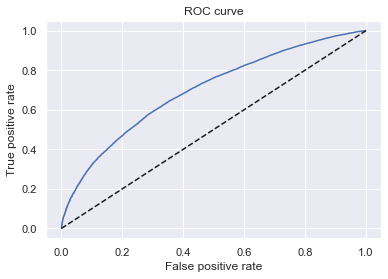

In [118]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [119]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6982953430296732

### Gini and Kolmogorov-Smirnov

In [120]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [121]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42368,0,0.410890,0
42396,0,0.411979,0
42438,1,0.414124,0
42398,0,0.423700,0
42295,0,0.436536,0


In [122]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
242576,1,0.993072,1
235675,1,0.993254,1
282589,1,0.993783,1
236599,1,0.994060,1
305809,1,0.994251,1


In [123]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [124]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42368,0,0.410890,0
1,42396,0,0.411979,0
2,42438,1,0.414124,0
3,42398,0,0.423700,0
4,42295,0,0.436536,0


In [125]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [126]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42368,0,0.410890,0,1,0,1
1,42396,0,0.411979,0,2,0,2
2,42438,1,0.414124,0,3,1,2
3,42398,0,0.423700,0,4,1,3
4,42295,0,0.436536,0,5,1,4


In [127]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])

df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()

df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [128]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42368,0,0.410890,0,1,0,1,0.000011,0.000000,0.000098
1,42396,0,0.411979,0,2,0,2,0.000021,0.000000,0.000196
2,42438,1,0.414124,0,3,1,2,0.000032,0.000012,0.000196
3,42398,0,0.423700,0,4,1,3,0.000043,0.000012,0.000294
4,42295,0,0.436536,0,5,1,4,0.000054,0.000012,0.000392


Text(0.5, 1.0, 'Gini')

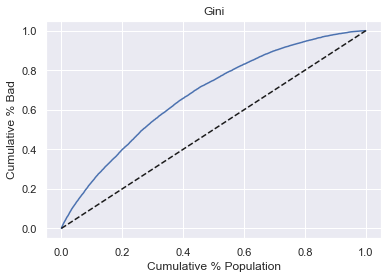

In [129]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [130]:
Gini = AUROC * 2 - 1
Gini

0.39659068605934644

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

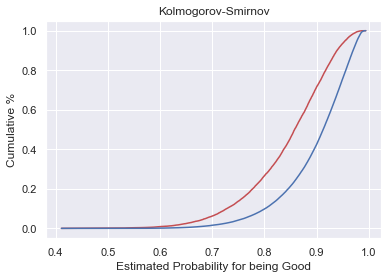

In [131]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [132]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29148726442315376

# Applying the PD Model

### Calculating PD of individual accounts

In [133]:
pd.options.display.max_columns = None

In [134]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:small_business__educational__moving__renewable_energy,purpose:other,purpose:house__medical__wedding__vacation,purpose:debt_consolidation,purpose:home_improvement__major_purchase__car,purpose:credit_card,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2_3,emp_length:4_5,emp_length:6_7,emp_length:8_9,emp_length:10,mths_since_issue_d:0_66,mths_since_issue_d:67_70,mths_since_issue_d:71_75,mths_since_issue_d:76_82,mths_since_issue_d:83_93,mths_since_issue_d:94_128,mths_since_issue_d:>=129,int_rate:0_9.961,int_rate:9.961_12.025,int_rate:12.025_15.74,int_rate:15.74_20.281,int_rate:>=20.281,mths_since_earliest_cr_line:0_207,mths_since_earliest_cr_line:208_350,mths_since_earliest_cr_line:>=351,delinq_2yrs:0,delinq_2yrs:1_3,delinq_2yrs:>=3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2_3,inq_last_6mths:>3,open_acc:<=3,open_acc:4_5,open_acc:6_13,open_acc:13_17,open_acc:>17,pub_rec:0,pub_rec:1,pub_rec:2,pub_rec:3,pub_rec:>3,total_acc:0_6.24,total_acc:6.24_21.84,total_acc:21.84_37.44,total_acc:37.44_40.56,total_acc:>=40.56,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5k,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,installment:0_127,installment:127_210,installment:210_266,installment:266_294,installment:294_322,installment:322_378,installment:378_406,installment:406_433,installment:433_517,installment:517_545,installment:545_629,installment:629_712,installment:712_796,installment:796_852,installment:852_880,installment:880_935,installment:935_963,installment:>=963,annual_inc:<20k,annual_inc:20k_30k,annual_inc:30k_40k,annual_inc:40k_50k,annual_inc:50k_60k,annual_inc:60k_70k,annual_inc:70k_80k,annual_inc:80k_90k,annual_inc:90k_100k,annual_inc:100k_120k,annual_inc:120k_140k,annual_inc:>140k,mths_since_last_delinq:missing,mths_since_last_delinq:0_3,mths_since_last_delinq:4_30,mths_since_last_delinq:31_56,mths_since_last_delinq:>=57,dti:0_0.7,dti:0.7_1.4,dti:1.4_2.1,dti:2.1_3.5,dti:3.5_4.9,dti:4.9_5.6,dti:5.6_6.3,dti:6.3_7,dti:7_9,dti:9_9.8,dti:9.8_10.5,dti:10.5_11.2,dti:11.2_11.9,dti:11.9_12.6,dti:12.6_13.3,dti:13.3_14,dti:14_14.7,dti:14.7_17.5,dti:17.5_18.2,dti:18.2_21,dti:21_21.7,dti:21.7_22.4,dti:22.4_23.1,dti:23.1_25.2,dti:25.2_25.9,dti:25.9_29.4,dti:29.4_30.1,dti:30.1_30.8,dti:30.8_31.5,dti:31.5_32.2,dti:32.2_32.9,dti:32.9_33.6,dti:>=33.6,mths_since_last_record:missing,mths_since_last_record:0_2,mths_since_last_record:3_22,mths_since_last_record:23_46,mths_since_last_record:47_68,mths_since_last_record:69_85,mths_since_last_record:>=86
193817,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
174039,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
37506,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1

In [135]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.617557,NaN
1,grade:A,1.102338,3.248589e-47
2,grade:B,0.762922,3.092765e-35
3,grade:C,0.565566,3.959633e-23
4,grade:D,0.405942,6.739597e-14
5,grade:E,0.267876,3.276600e-08
6,grade:F,0.116449,2.104312e-02
7,home_ownership:OWN,0.111902,2.633358e-08
8,home_ownership:MORTGAGE,0.140042,7.998317e-29
9,addr_state:NM_VA,-0.010034,7.312208e-01


In [136]:
y_hat_test_proba

array([0.88882336, 0.80474801, 0.74742146, ..., 0.97458585, 0.96900233,
       0.89663352])

### Creating a Scorecard

In [137]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.617557,NaN
1,grade:A,1.102338,3.248589e-47
2,grade:B,0.762922,3.092765e-35
3,grade:C,0.565566,3.959633e-23
4,grade:D,0.405942,6.739597e-14
5,grade:E,0.267876,3.276600e-08
6,grade:F,0.116449,2.104312e-02
7,home_ownership:OWN,0.111902,2.633358e-08
8,home_ownership:MORTGAGE,0.140042,7.998317e-29
9,addr_state:NM_VA,-0.010034,7.312208e-01


In [138]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:small_business__educational__moving__renewable_energy',
 'initial_list_status:f',
 'term:36',
 'emp_length:0',
 'mths_since_issue_d:>=129',
 'int_rate:>=20.281',
 'mths_since_earliest_cr_line:0_207',
 'delinq_2yrs:0',
 'inq_last_6mths:>3',
 'open_acc:<=3',
 'pub_rec:0',
 'total_acc:0_6.24',
 'acc_now_delinq:0',
 'total_rev_hi_lim:<=5k',
 'installment:0_127',
 'annual_inc:<20k',
 'mths_since_last_delinq:missing',
 'dti:>=33.6',
 'mths_since_last_record:>=86']

In [139]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

df_ref_categories.head()

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:small_business__educational__moving__r...,0,NaN


In [140]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard.head()

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.617557,NaN
1,1,grade:A,1.102338,3.248589e-47
2,2,grade:B,0.762922,3.092765e-35
3,3,grade:C,0.565566,3.959633e-23
4,4,grade:D,0.405942,6.739597e-14


In [141]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [142]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.617557,NaN,Intercept
1,1,grade:A,1.102338,3.248589e-47,grade
2,2,grade:B,0.762922,3.092765e-35,grade
3,3,grade:C,0.565566,3.959633e-23,grade
4,4,grade:D,0.405942,6.739597e-14,grade


In [143]:
min_score = 300
max_score = 850

In [144]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -0.617557
acc_now_delinq                -0.042214
addr_state                    -0.010034
annual_inc                    -0.126702
delinq_2yrs                   -0.093997
dti                           -0.058103
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
installment                   -0.694255
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.011027
mths_since_last_delinq        -0.054045
mths_since_last_record        -0.272306
open_acc                      -0.151759
pub_rec                       -0.123872
purpose                        0.000000
term                          -0.091068
total_acc                     -0.022577
total_rev_hi_lim               0.000000
verification_status           -0.050808
Name: Coefficients

In [145]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-2.420324319966351

In [146]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -0.617557
acc_now_delinq                 0.000000
addr_state                     0.411883
annual_inc                     0.644207
delinq_2yrs                    0.000000
dti                            0.367437
emp_length                     0.280019
grade                          1.102338
home_ownership                 0.140042
initial_list_status            0.045244
inq_last_6mths                 0.463673
installment                    0.000000
int_rate                       0.793883
mths_since_earliest_cr_line    0.085428
mths_since_issue_d             1.026166
mths_since_last_delinq         0.071441
mths_since_last_record         0.334469
open_acc                       0.025669
pub_rec                        0.000000
purpose                        0.493470
term                           0.000000
total_acc                      0.013867
total_rev_hi_lim               0.465930
verification_status            0.000000
Name: Coefficients

In [147]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

6.147610574152037

In [148]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.617557,NaN,Intercept,-39.642717
1,1,grade:A,1.102338,3.248589e-47,grade,70.762177
2,2,grade:B,0.762922,3.092765e-35,grade,48.974146
3,3,grade:C,0.565566,3.959633e-23,grade,36.305309
4,4,grade:D,0.405942,6.739597e-14,grade,26.058575


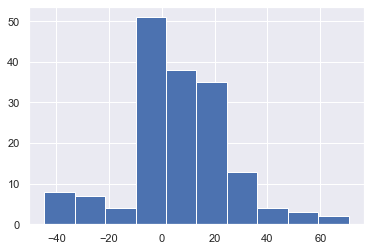

In [149]:
df_scorecard['Score - Calculation'].hist()

In [150]:
df_scorecard['Score - Calculation'][0] = ( 
    ( df_scorecard['Coefficients'][0]
     - min_sum_coef
    ) 
    / 
    (max_sum_coef - min_sum_coef)
    ) * (max_score - min_score) + min_score


df_scorecard.head()

/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.617557,NaN,Intercept,415.724754
1,1,grade:A,1.102338,3.248589e-47,grade,70.762177
2,2,grade:B,0.762922,3.092765e-35,grade,48.974146
3,3,grade:C,0.565566,3.959633e-23,grade,36.305309
4,4,grade:D,0.405942,6.739597e-14,grade,26.058575


In [151]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.617557,NaN,Intercept,415.724754,416.0
1,1,grade:A,1.102338,3.248589e-47,grade,70.762177,71.0
2,2,grade:B,0.762922,3.092765e-35,grade,48.974146,49.0
3,3,grade:C,0.565566,3.959633e-23,grade,36.305309,36.0
4,4,grade:D,0.405942,6.739597e-14,grade,26.058575,26.0


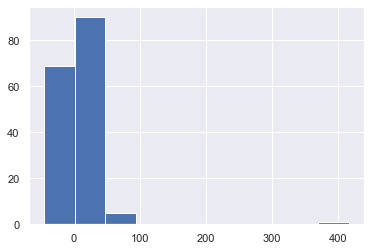

In [152]:
df_scorecard['Score - Preliminary'].hist()

In [153]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [154]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max(). sum()
max_sum_score_prel

851.0

In [155]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']

df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.617557,NaN,Intercept,415.724754,416.0,0.275246
1,1,grade:A,1.102338,3.248589e-47,grade,70.762177,71.0,0.237823
2,2,grade:B,0.762922,3.092765e-35,grade,48.974146,49.0,0.025854
3,3,grade:C,0.565566,3.959633e-23,grade,36.305309,36.0,-0.305309
4,4,grade:D,0.405942,6.739597e-14,grade,26.058575,26.0,-0.058575


In [156]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard.head()

/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.617557,NaN,Intercept,415.724754,416.0,0.275246,416.0
1,1,grade:A,1.102338,3.248589e-47,grade,70.762177,71.0,0.237823,71.0
2,2,grade:B,0.762922,3.092765e-35,grade,48.974146,49.0,0.025854,49.0
3,3,grade:C,0.565566,3.959633e-23,grade,36.305309,36.0,-0.305309,36.0
4,4,grade:D,0.405942,6.739597e-14,grade,26.058575,26.0,-0.058575,26.0


In [157]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [158]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max(). sum()
max_sum_score_prel

867.0

### Caclulating Credit Score

In [159]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:small_business__educational__moving__renewable_energy,purpose:other,purpose:house__medical__wedding__vacation,purpose:debt_consolidation,purpose:home_improvement__major_purchase__car,purpose:credit_card,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2_3,emp_length:4_5,emp_length:6_7,emp_length:8_9,emp_length:10,mths_since_issue_d:0_66,mths_since_issue_d:67_70,mths_since_issue_d:71_75,mths_since_issue_d:76_82,mths_since_issue_d:83_93,mths_since_issue_d:94_128,mths_since_issue_d:>=129,int_rate:0_9.961,int_rate:9.961_12.025,int_rate:12.025_15.74,int_rate:15.74_20.281,int_rate:>=20.281,mths_since_earliest_cr_line:0_207,mths_since_earliest_cr_line:208_350,mths_since_earliest_cr_line:>=351,delinq_2yrs:0,delinq_2yrs:1_3,delinq_2yrs:>=3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2_3,inq_last_6mths:>3,open_acc:<=3,open_acc:4_5,open_acc:6_13,open_acc:13_17,open_acc:>17,pub_rec:0,pub_rec:1,pub_rec:2,pub_rec:3,pub_rec:>3,total_acc:0_6.24,total_acc:6.24_21.84,total_acc:21.84_37.44,total_acc:37.44_40.56,total_acc:>=40.56,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5k,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,installment:0_127,installment:127_210,installment:210_266,installment:266_294,installment:294_322,installment:322_378,installment:378_406,installment:406_433,installment:433_517,installment:517_545,installment:545_629,installment:629_712,installment:712_796,installment:796_852,installment:852_880,installment:880_935,installment:935_963,installment:>=963,annual_inc:<20k,annual_inc:20k_30k,annual_inc:30k_40k,annual_inc:40k_50k,annual_inc:50k_60k,annual_inc:60k_70k,annual_inc:70k_80k,annual_inc:80k_90k,annual_inc:90k_100k,annual_inc:100k_120k,annual_inc:120k_140k,annual_inc:>140k,mths_since_last_delinq:missing,mths_since_last_delinq:0_3,mths_since_last_delinq:4_30,mths_since_last_delinq:31_56,mths_since_last_delinq:>=57,dti:0_0.7,dti:0.7_1.4,dti:1.4_2.1,dti:2.1_3.5,dti:3.5_4.9,dti:4.9_5.6,dti:5.6_6.3,dti:6.3_7,dti:7_9,dti:9_9.8,dti:9.8_10.5,dti:10.5_11.2,dti:11.2_11.9,dti:11.9_12.6,dti:12.6_13.3,dti:13.3_14,dti:14_14.7,dti:14.7_17.5,dti:17.5_18.2,dti:18.2_21,dti:21_21.7,dti:21.7_22.4,dti:22.4_23.1,dti:23.1_25.2,dti:25.2_25.9,dti:25.9_29.4,dti:29.4_30.1,dti:30.1_30.8,dti:30.8_31.5,dti:31.5_32.2,dti:32.2_32.9,dti:32.9_33.6,dti:>=33.6,mths_since_last_record:missing,mths_since_last_record:0_2,mths_since_last_record:3_22,mths_since_last_record:23_46,mths_since_last_record:47_68,mths_since_last_record:69_85,mths_since_last_record:>=86
193817,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
174039,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
37506,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1

In [160]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.617557,NaN,Intercept,415.724754,416.0,0.275246,416.0
1,1,grade:A,1.102338,3.248589e-47,grade,70.762177,71.0,0.237823,71.0
2,2,grade:B,0.762922,3.092765e-35,grade,48.974146,49.0,0.025854,49.0
3,3,grade:C,0.565566,3.959633e-23,grade,36.305309,36.0,-0.305309,36.0
4,4,grade:D,0.405942,6.739597e-14,grade,26.058575,26.0,-0.058575,26.0
5,5,grade:E,0.267876,3.276600e-08,grade,17.195730,17.0,-0.195730,17.0
6,6,grade:F,0.116449,2.104312e-02,grade,7.475182,7.0,-0.475182,7.0
7,7,home_ownership:OWN,0.111902,2.633358e-08,home_ownership,7.183292,7.0,-0.183292,7.0
8,8,home_ownership:MORTGAGE,0.140042,7.998317e-29,home_ownership,8.989676,9.0,0.010324,9.0
9,9,addr_state:NM_VA,-0.010034,7.312208e-01,addr_state,-0.644135,-1.0,-0.355865,-1.0


In [161]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [162]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [163]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:small_business__educational__moving__renewable_energy,purpose:other,purpose:house__medical__wedding__vacation,purpose:debt_consolidation,purpose:home_improvement__major_purchase__car,purpose:credit_card,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2_3,emp_length:4_5,emp_length:6_7,emp_length:8_9,emp_length:10,mths_since_issue_d:0_66,mths_since_issue_d:67_70,mths_since_issue_d:71_75,mths_since_issue_d:76_82,mths_since_issue_d:83_93,mths_since_issue_d:94_128,mths_since_issue_d:>=129,int_rate:0_9.961,int_rate:9.961_12.025,int_rate:12.025_15.74,int_rate:15.74_20.281,int_rate:>=20.281,mths_since_earliest_cr_line:0_207,mths_since_earliest_cr_line:208_350,mths_since_earliest_cr_line:>=351,delinq_2yrs:0,delinq_2yrs:1_3,delinq_2yrs:>=3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2_3,inq_last_6mths:>3,open_acc:<=3,open_acc:4_5,open_acc:6_13,open_acc:13_17,open_acc:>17,pub_rec:0,pub_rec:1,pub_rec:2,pub_rec:3,pub_rec:>3,total_acc:0_6.24,total_acc:6.24_21.84,total_acc:21.84_37.44,total_acc:37.44_40.56,total_acc:>=40.56,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5k,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,installment:0_127,installment:127_210,installment:210_266,installment:266_294,installment:294_322,installment:322_378,installment:378_406,installment:406_433,installment:433_517,installment:517_545,installment:545_629,installment:629_712,installment:712_796,installment:796_852,installment:852_880,installment:880_935,installment:935_963,installment:>=963,annual_inc:<20k,annual_inc:20k_30k,annual_inc:30k_40k,annual_inc:40k_50k,annual_inc:50k_60k,annual_inc:60k_70k,annual_inc:70k_80k,annual_inc:80k_90k,annual_inc:90k_100k,annual_inc:100k_120k,annual_inc:120k_140k,annual_inc:>140k,mths_since_last_delinq:missing,mths_since_last_delinq:0_3,mths_since_last_delinq:4_30,mths_since_last_delinq:31_56,mths_since_last_delinq:>=57,dti:0_0.7,dti:0.7_1.4,dti:1.4_2.1,dti:2.1_3.5,dti:3.5_4.9,dti:4.9_5.6,dti:5.6_6.3,dti:6.3_7,dti:7_9,dti:9_9.8,dti:9.8_10.5,dti:10.5_11.2,dti:11.2_11.9,dti:11.9_12.6,dti:12.6_13.3,dti:13.3_14,dti:14_14.7,dti:14.7_17.5,dti:17.5_18.2,dti:18.2_21,dti:21_21.7,dti:21.7_22.4,dti:22.4_23.1,dti:23.1_25.2,dti:25.2_25.9,dti:25.9_29.4,dti:29.4_30.1,dti:30.1_30.8,dti:30.8_31.5,dti:31.5_32.2,dti:32.2_32.9,dti:32.9_33.6,dti:>=33.6,mths_since_last_record:missing,mths_since_last_record:0_2,mths_since_last_record:3_22,mths_since_last_record:23_46,mths_since_last_record:47_68,mths_since_last_record:69_85,mths_since_last_record:>=86
193817,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
174039,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
37506,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0

In [164]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [165]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other,purpose:house__medical__wedding__vacation,purpose:debt_consolidation,purpose:home_improvement__major_purchase__car,purpose:credit_card,initial_list_status:w,term:60,emp_length:1,emp_length:2_3,emp_length:4_5,emp_length:6_7,emp_length:8_9,emp_length:10,mths_since_issue_d:0_66,mths_since_issue_d:67_70,mths_since_issue_d:71_75,mths_since_issue_d:76_82,mths_since_issue_d:83_93,mths_since_issue_d:94_128,int_rate:0_9.961,int_rate:9.961_12.025,int_rate:12.025_15.74,int_rate:15.74_20.281,mths_since_earliest_cr_line:208_350,mths_since_earliest_cr_line:>=351,delinq_2yrs:1_3,delinq_2yrs:>=3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2_3,open_acc:4_5,open_acc:6_13,open_acc:13_17,open_acc:>17,pub_rec:1,pub_rec:2,pub_rec:3,pub_rec:>3,total_acc:6.24_21.84,total_acc:21.84_37.44,total_acc:37.44_40.56,total_acc:>=40.56,acc_now_delinq:>=1,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,installment:127_210,installment:210_266,installment:266_294,installment:294_322,installment:322_378,installment:378_406,installment:406_433,installment:433_517,installment:517_545,installment:545_629,installment:629_712,installment:712_796,installment:796_852,installment:852_880,installment:880_935,installment:935_963,installment:>=963,annual_inc:20k_30k,annual_inc:30k_40k,annual_inc:40k_50k,annual_inc:50k_60k,annual_inc:60k_70k,annual_inc:70k_80k,annual_inc:80k_90k,annual_inc:90k_100k,annual_inc:100k_120k,annual_inc:120k_140k,annual_inc:>140k,mths_since_last_delinq:0_3,mths_since_last_delinq:4_30,mths_since_last_delinq:31_56,mths_since_last_delinq:>=57,dti:0_0.7,dti:0.7_1.4,dti:1.4_2.1,dti:2.1_3.5,dti:3.5_4.9,dti:4.9_5.6,dti:5.6_6.3,dti:6.3_7,dti:7_9,dti:9_9.8,dti:9.8_10.5,dti:10.5_11.2,dti:11.2_11.9,dti:11.9_12.6,dti:12.6_13.3,dti:13.3_14,dti:14_14.7,dti:14.7_17.5,dti:17.5_18.2,dti:18.2_21,dti:21_21.7,dti:21.7_22.4,dti:22.4_23.1,dti:23.1_25.2,dti:25.2_25.9,dti:25.9_29.4,dti:29.4_30.1,dti:30.1_30.8,dti:30.8_31.5,dti:31.5_32.2,dti:32.2_32.9,dti:32.9_33.6,mths_since_last_record:missing,mths_since_last_record:0_2,mths_since_last_record:3_22,mths_since_last_record:23_46,mths_since_last_record:47_68,mths_since_last_record:69_85,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:small_business__educational__moving__renewable_energy,initial_list_status:f,term:36,emp_length:0,mths_since_issue_d:>=129,int_rate:>=20.281,mths_since_earliest_cr_line:0_207,delinq_2yrs:0,inq_last_6mths:>3,open_acc:<=3,pub_rec:0,total_acc:0_6.24,acc_now_delinq:0,total_rev_hi_lim:<=5k,installment:0_127,annual_inc:<20k,mths_since_last_delinq:missing,dti:>=33.6,mths_since_last_record:>=86
193817,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0
174039,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
37506,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0

In [208]:
scorecard_scores = df_scorecard['Score - Final']

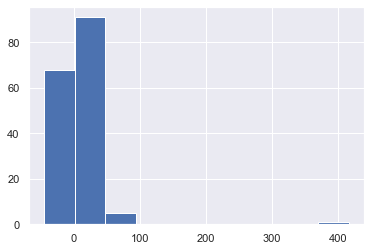

In [210]:
df_scorecard['Score - Final'].hist()

In [211]:
df_scorecard['Score - Final'].describe()

count    165.000000
mean       9.575758
std       36.946757
min      -45.000000
25%        0.000000
50%        5.000000
75%       17.000000
max      416.000000
Name: Score - Final, dtype: float64

In [167]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 165)

In [168]:
scorecard_scores.shape

(165,)

In [170]:
scorecard_scores = scorecard_scores.values.reshape(-1, 1)

In [171]:
scorecard_scores.shape

(165, 1)

In [172]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [173]:
y_scores.head()

,0
193817,589.0
174039,546.0
37506,525.0
182976,535.0
148379,568.0


In [174]:
y_scores.tail()

,0
396281,595.0
283886,642.0
43103,731.0
308040,677.0
135473,594.0


In [175]:
y_scores.describe()

,0
count,93257.000000
mean,607.268420
std,52.174203
min,432.000000
25%,570.000000
50%,604.000000
75%,643.000000
max,797.000000


### From Credit Score to PD

In [176]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [177]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
193817,0.889115
174039,0.804062
37506,0.747390
182976,0.775655
148379,0.852532


In [178]:
y_hat_test_proba[0: 5]

array([0.88882336, 0.80474801, 0.74742146, 0.77885901, 0.85391892])

In [179]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.410890
1    0.411979
2    0.414124
3    0.423700
4    0.436536
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [180]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [181]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7292,2900
1,35262,47803


In [182]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078193,0.031097
1,0.378116,0.512594


In [183]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5907867505924489

In [184]:
from sklearn.metrics import roc_curve, roc_auc_score

In [185]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980377, 0.99980377,
        1.        ]),
 array([0.00000000e+00, 1.20387648e-05, 5.41744417e-04, ...,
        9.99987961e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99425117, 0.99425117, 0.9907807 , ..., 0.4236996 , 0.41412399,
        0.41089002]))

In [186]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

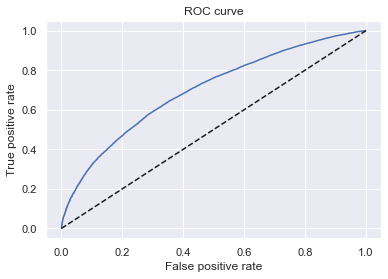

In [188]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [189]:
thresholds

array([1.99425117, 0.99425117, 0.9907807 , ..., 0.4236996 , 0.41412399,
       0.41089002])

In [190]:
thresholds.shape

(17270,)

In [191]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [192]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [193]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.994251,0.000000,0.000000
1,0.994251,0.000000,0.000012
2,0.990781,0.000000,0.000542
3,0.990764,0.000098,0.000542
4,0.988363,0.000098,0.003046


In [194]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [195]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [196]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2814.0
1,0.994251,0.000000,0.000012,786.0
2,0.990781,0.000000,0.000542,756.0
3,0.990764,0.000098,0.000542,755.0
4,0.988363,0.000098,0.003046,741.0


In [197]:
df_cutoffs['Score'][0] = max_score

In [198]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.994251,0.000000,0.000012,786.0
2,0.990781,0.000000,0.000542,756.0
3,0.990764,0.000098,0.000542,755.0
4,0.988363,0.000098,0.003046,741.0


In [199]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17265,0.489482,0.999019,0.999952,453.0
17266,0.482201,0.999019,0.999988,451.0
17267,0.423700,0.999804,0.999988,436.0
17268,0.414124,0.999804,1.000000,433.0
17269,0.410890,1.000000,1.000000,432.0


In [200]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [201]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [202]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.994251,0.000000,0.000012,786.0,1,93256,0.000011,0.999989
2,0.990781,0.000000,0.000542,756.0,45,93212,0.000483,0.999517
3,0.990764,0.000098,0.000542,755.0,46,93211,0.000493,0.999507
4,0.988363,0.000098,0.003046,741.0,254,93003,0.002724,0.997276


In [203]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17265,0.489482,0.999019,0.999952,453.0,93243,14,0.999850,0.000150
17266,0.482201,0.999019,0.999988,451.0,93246,11,0.999882,0.000118
17267,0.423700,0.999804,0.999988,436.0,93254,3,0.999968,0.000032
17268,0.414124,0.999804,1.000000,433.0,93255,2,0.999979,0.000021
17269,0.410890,1.000000,1.000000,432.0,93257,0,1.000000,0.000000


In [204]:
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.904175,0.265895,0.551123,599.0,48489,44768,0.519950,0.480050
5001,0.904174,0.265993,0.551123,599.0,48490,44767,0.519961,0.480039
5002,0.904167,0.265993,0.551159,599.0,48493,44764,0.519993,0.480007
5003,0.904162,0.266091,0.551159,599.0,48494,44763,0.520004,0.479996
5004,0.904137,0.266091,0.551351,599.0,48510,44747,0.520175,0.479825
5005,0.904137,0.266189,0.551351,599.0,48511,44746,0.520186,0.479814
5006,0.904119,0.266189,0.551484,599.0,48522,44735,0.520304,0.479696
5007,0.904119,0.266287,0.551484,599.0,48523,44734,0.520315,0.479685
5008,0.904113,0.266287,0.551496,599.0,48524,44733,0.520326,0.479674
5009,0.904111,0.266385,0.551496,599.0,48525,44732,0.520336,0.479664


In [205]:
df_cutoffs.iloc[1000: 2000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.954700,0.050530,0.208752,651.0,17855,75402,0.191460,0.808540
1001,0.954699,0.050628,0.208752,651.0,17856,75401,0.191471,0.808529
1002,0.954677,0.050628,0.208897,651.0,17868,75389,0.191600,0.808400
1003,0.954677,0.050726,0.208897,651.0,17869,75388,0.191610,0.808390
1004,0.954669,0.050726,0.208969,651.0,17875,75382,0.191675,0.808325
1005,0.954669,0.050824,0.208969,651.0,17876,75381,0.191685,0.808315
1006,0.954490,0.050824,0.210161,651.0,17975,75282,0.192747,0.807253
1007,0.954490,0.050922,0.210161,651.0,17976,75281,0.192758,0.807242
1008,0.954467,0.050922,0.210389,651.0,17995,75262,0.192961,0.807039
1009,0.954466,0.051020,0.210389,651.0,17996,75261,0.192972,0.807028


In [206]:
inputs_train_with_ref_cat.to_csv( data_home + 'inputs_train_with_ref_cat.csv')

In [207]:
df_scorecard.to_csv(data_home + 'df_scorecard.csv')